In [218]:
pwd

'/Users/daniellejenkins17/Documents/GitHub/Banknote-Classification-Project'

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from scipy import stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# UC Irvine Banknote Authentication Data Set (Bills)

In [328]:
df = pd.read_csv('/Users/daniellejenkins17/Downloads/data_banknote_authentication.txt', delimiter =',')

In [220]:
#Variance is the changes in the model when using different portions of the training data set
#Assess model variance with cross validation
#Variance comes from highly complex models with a large number of features

#Entropy: a measure of heterogeneity
    
#Skewness and Kurtosis: 
#Skewness is the degree of distortion or deviation from the symmetrical normal distribution. 
#Skewness can calculate the lack of symmetry in the data. 

#- A skewness between -0.5 and 0.5 means that the data are pretty symmetrical
#- A skewness between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed) means that 
#  the data are moderately skewed.
#- A skewness smaller than -1 (negatively skewed) or bigger than 1 (positively skewed) means that the data 
#  are highly skewed.

#Kurtosis deals with the lengths of tails in the distribution...it's a measure of outliers...high kurtosis 
#means a lot of outliers...investigate why

In [221]:
df 

#In the Banknote Authentication dataset, class 0 is “genuine/authentic” and class 1 is “forgery/fake”

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [222]:
df.info

<bound method DataFrame.info of        3.6216    8.6661  -2.8073  -0.44699  0
0     4.54590   8.16740  -2.4586  -1.46210  0
1     3.86600  -2.63830   1.9242   0.10645  0
2     3.45660   9.52280  -4.0112  -3.59440  0
3     0.32924  -4.45520   4.5718  -0.98880  0
4     4.36840   9.67180  -3.9606  -3.16250  0
...       ...       ...      ...       ... ..
1366  0.40614   1.34920  -1.4501  -0.55949  1
1367 -1.38870  -4.87730   6.4774   0.34179  1
1368 -3.75030 -13.45860  17.5932  -2.77710  1
1369 -3.56370  -8.38270  12.3930  -1.28230  1
1370 -2.54190  -0.65804   2.6842   1.19520  1

[1371 rows x 5 columns]>

In [223]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [224]:
df.mean()

3.6216      0.431410
8.6661      1.917434
-2.8073     1.400694
-0.44699   -1.192200
0           0.444931
dtype: float64

In [225]:
df.median()

3.6216      0.49571
8.6661      2.31340
-2.8073     0.61663
-0.44699   -0.58665
0           0.00000
dtype: float64

# Renaming Columns 

In [348]:
df.columns = ['Variance', 'Skewness', "Kurtosis", "Entropy", "Authentic_Fake"]
df

#1. variance of Wavelet Transformed image (continuous) 
#2. skewness of Wavelet Transformed image (continuous) 
#3. kurtosis of Wavelet Transformed image (continuous) 
#4. entropy of image (continuous) 
#5. class (integer) 

,Variance,Skewness,Kurtosis,Entropy,Authentic_Fake
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [331]:
df.Authentic_Fake.value_counts()

0    761
1    610
Name: Authentic_Fake, dtype: int64

In [332]:
df.Authentic_Fake.value_counts(normalize = True)

0    0.555069
1    0.444931
Name: Authentic_Fake, dtype: float64

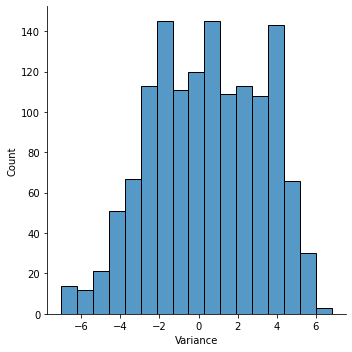

In [333]:
sns.displot(df['Variance'])

#all banknotes

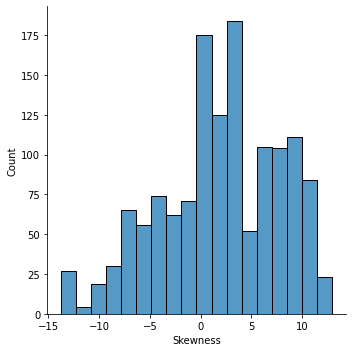

In [334]:
sns.displot(df['Skewness'])

#all banknotes

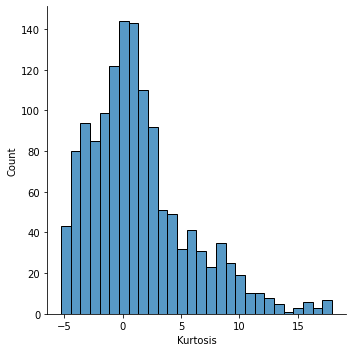

In [335]:
sns.displot(df['Kurtosis'])

#all banknotes

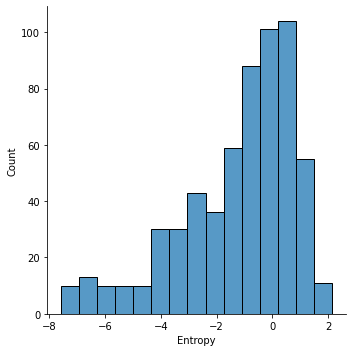

In [336]:
sns.displot(df[df['Authentic_Fake'] == 1]['Entropy'])

#Fake Bills  

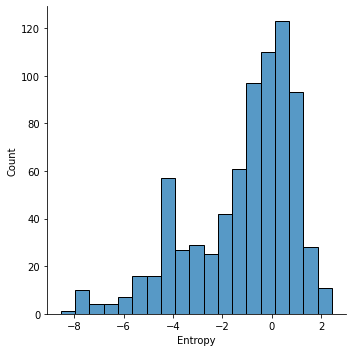

In [337]:
sns.displot(df[df['Authentic_Fake'] == 0]['Entropy'])

#Authentic Bills

<AxesSubplot:xlabel='Entropy', ylabel='Kurtosis'>

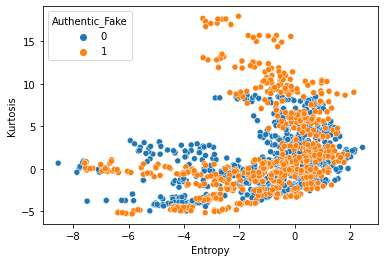

In [338]:
sns.scatterplot(data = df, x = 'Entropy', y = 'Kurtosis', hue = 'Authentic_Fake')

<AxesSubplot:xlabel='Entropy', ylabel='Skewness'>

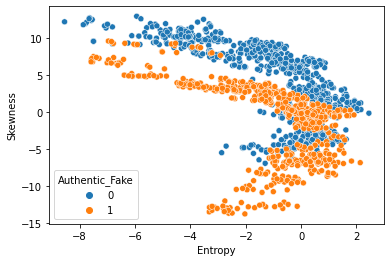

In [339]:
sns.scatterplot(data = df, x = 'Entropy', y = 'Skewness', hue = 'Authentic_Fake')

<AxesSubplot:xlabel='Kurtosis', ylabel='Skewness'>

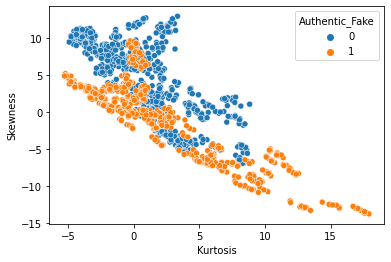

In [340]:
sns.scatterplot(data = df, x = 'Kurtosis', y = 'Skewness', hue = 'Authentic_Fake')

<AxesSubplot:xlabel='Entropy', ylabel='Variance'>

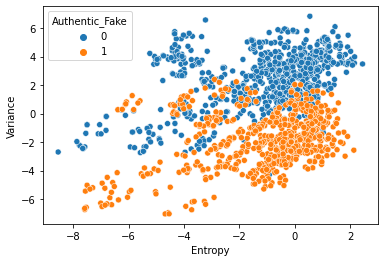

In [341]:
sns.scatterplot(data = df, x = 'Entropy', y = 'Variance', hue = 'Authentic_Fake')

<AxesSubplot:xlabel='Kurtosis', ylabel='Variance'>

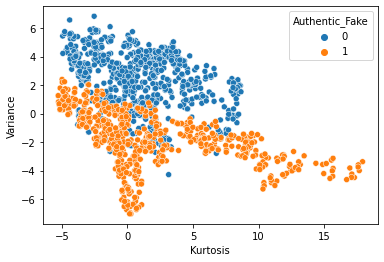

In [342]:
sns.scatterplot(data = df, x = 'Kurtosis', y = 'Variance', hue = 'Authentic_Fake')

<AxesSubplot:xlabel='Variance', ylabel='Skewness'>

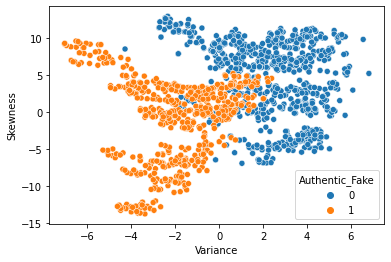

In [343]:
sns.scatterplot(data = df, x = 'Variance', y = 'Skewness', hue = 'Authentic_Fake')

In [238]:
df

,Variance,Skewness,Kurtosis,Entropy,Authentic_Fake
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [239]:
y = df['Authentic_Fake']
X = df.drop('Authentic_Fake', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=87)

In [240]:
X_train #75%

,Variance,Skewness,Kurtosis,Entropy
1203,-2.77230,3.2777,-0.93510,-3.145700
268,4.93420,2.4107,-0.17594,1.624500
472,2.82090,7.3108,-0.81857,-1.878400
557,4.38460,-4.8794,3.36620,-0.029324
1259,-3.00000,-9.1566,9.57660,-0.730180
...,...,...,...,...
1030,-1.85540,-9.6035,7.77640,-0.977160
1275,-0.89809,-4.4862,2.20090,0.507310
143,3.84810,10.1539,-3.85610,-4.222800
699,3.92620,6.0299,-2.01560,-0.065531


In [241]:
X_test #25%

,Variance,Skewness,Kurtosis,Entropy
933,-1.61760,1.0926,-0.35502,-0.599580
1043,-1.49040,-2.2183,1.60540,0.893940
102,3.33970,-4.6145,3.98230,-0.237510
227,3.12190,-3.1370,1.92590,-0.374580
180,-0.11783,-1.5789,8.03000,-0.028031
...,...,...,...,...
976,-1.23900,-6.5410,4.81510,-0.033204
386,4.63610,-2.6611,2.83580,1.199100
269,3.84170,10.0215,-4.26990,-4.915900
1253,-3.88940,-7.8322,9.82080,0.474980


In [242]:
y_train #75%

1203    1
268     0
472     0
557     0
1259    1
       ..
1030    1
1275    1
143     0
699     0
333     0
Name: Authentic_Fake, Length: 1028, dtype: int64

In [243]:
y_test  #25%

933     1
1043    1
102     0
227     0
180     0
       ..
976     1
386     0
269     0
1253    1
217     0
Name: Authentic_Fake, Length: 343, dtype: int64

In [244]:
from sklearn.linear_model import LogisticRegression

#baseline model 
#call this function for dec tree and random forest 

In [245]:
LogReg = LogisticRegression()

In [246]:
LogReg.fit(X_train, y_train)

LogisticRegression()

In [247]:
LogReg.score(X_train, y_train)  #accuracy score 

0.9892996108949417

In [248]:
#confusion matrix:

# get predictions
y_pred = LogReg.predict(X_test) 

# calculate confusion matrix
cfmat = confusion_matrix(y_test, y_pred) 

cfmat

array([[186,   1],
       [  1, 155]])

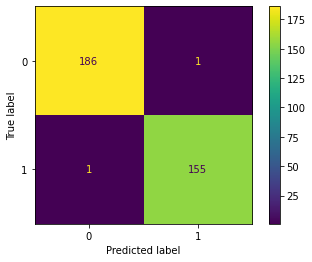

In [249]:
plot_confusion_matrix(LogReg, 
                      X_test, y_test)
plt.show()

In [250]:
tn, fp, fn, tp = cfmat.flatten()
print(tn,fn,fp,tp)

print(cfmat)

186 1 1 155
[[186   1]
 [  1 155]]


In [251]:
acc = (tp + tn) / (tp + tn + fp + fn)
print(acc)

0.9941690962099126


In [252]:
prec = tp/(tp+fp)
prec

0.9935897435897436

In [253]:
precision_score(y_test, y_pred)

0.9935897435897436

In [254]:
rec = tp / (tp + fn)
print(rec)

0.9935897435897436


In [255]:
recall_score(y_test, y_pred)

0.9935897435897436

In [256]:
f1_sc = 2*prec*rec / (prec + rec)
print(f1_sc)

0.9935897435897436


In [257]:
f1_score(y_pred, y_test)

#classification report gets all these at once 

0.9935897435897436

<AxesSubplot:xlabel='Variance', ylabel='Authentic_Fake'>

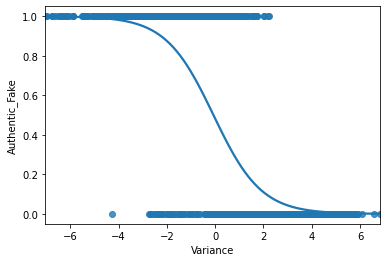

In [258]:
#These are just visualizations...not having to do with baseline model at all 

sns.regplot(x=X_train['Variance'], y=y_train, logistic=True, ci=None)

<AxesSubplot:xlabel='Skewness', ylabel='Authentic_Fake'>

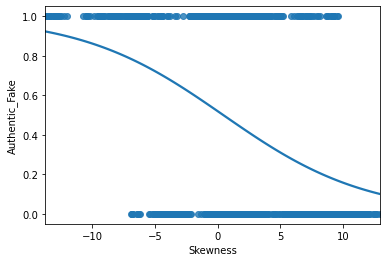

In [259]:
sns.regplot(x=X_train['Skewness'], y=y_train, logistic=True, ci=None)

<AxesSubplot:xlabel='Kurtosis', ylabel='Authentic_Fake'>

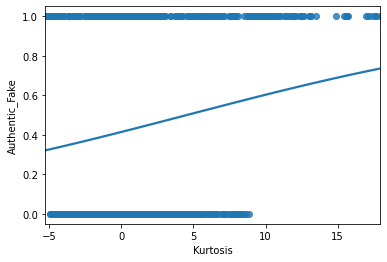

In [260]:
sns.regplot(x=X_train['Kurtosis'], y=y_train, logistic=True, ci=None)

#using coefficients to compare the target vs features: 
#spread is high, w is small, region is too wide

<AxesSubplot:xlabel='Entropy', ylabel='Authentic_Fake'>

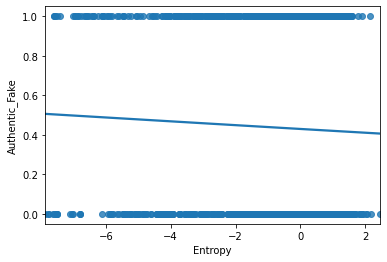

In [261]:
sns.regplot(x=X_train['Entropy'], y=y_train, logistic=True, ci=None)

In [262]:
#standard scaling of variables  (tuning the log reg model)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

ss

StandardScaler()

In [344]:
#pipeline: 

y = df['Authentic_Fake']
X = df.drop('Authentic_Fake', axis=1)
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=87) 

In [345]:
from sklearn import set_config
set_config(display= 'diagram')

In [346]:
steps = [('std_scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=87))]
pipeline = Pipeline(steps)
# Train the pipeline (tranformations & predictor)
pipeline.fit(X_train, y_train)
# Predict using the pipeline (includes the transfomers & trained predictor)
predicted = pipeline.predict(X_test)
predicted

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [278]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       190
           1       0.94      0.99      0.97       153

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343



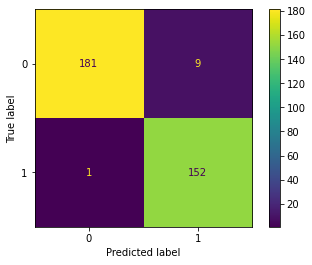

In [279]:
plot_confusion_matrix(pipeline, X_test, y_test)

In [280]:
pipeline

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=87))])

In [281]:
y.value_counts()

0    761
1    610
Name: Authentic_Fake, dtype: int64

In [ ]:
#Scikit-Learn has a GridSearchCV class whose fit() method:
#takes in a grid of hyperparameters
#loops through all of them in order
#runs cross-validation properly scoring by chosen metric

In [300]:
# let's define a new pipeline object 

steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('logreg', LogisticRegression())]

model_pipe = Pipeline(steps)

In [301]:
pipe_grid = {'imputer__strategy': ["mean", "median"],
             'logreg__C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3]}

# note: default scoring is aaccuracy
gs_pipe = GridSearchCV(estimator=model_pipe, 
                       param_grid=pipe_grid)

In [302]:
gs_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('std_scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'imputer__strategy': ['mean', 'median'],
                         'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000.0]})

In [303]:
gs_pipe.best_params_

{'imputer__strategy': 'mean', 'logreg__C': 100}

In [304]:
gs_pipe.best_score_

0.9912337201041913

In [305]:
best_model = gs_pipe.best_estimator_
best_model

Pipeline(steps=[('imputer', SimpleImputer()), ('std_scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=100))])

In [307]:
# take best estimator and train on full training set:

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

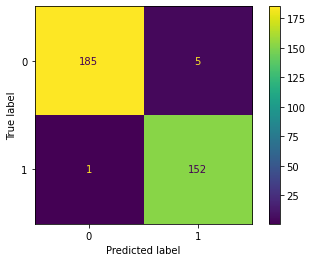

In [308]:
plot_confusion_matrix(best_model, X_test, y_test)

In [310]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       190
           1       0.97      0.99      0.98       153

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



Text(0.5, 0, 'Weight')

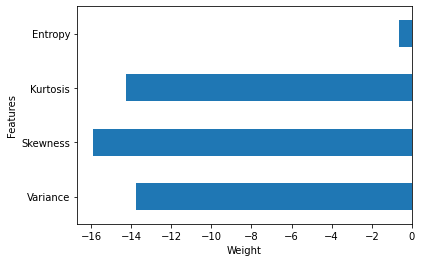

In [347]:
# Factors contributing to decision boundary
logist_reg_weights = best_model['logreg'].coef_[0]
w_series = pd.Series(logist_reg_weights)
w_series.index = X.columns

w_series.plot.barh()
plt.ylabel('Features')
plt.xlabel('Weight')

# Conclusion: Entropy is not important, Logistic Regression shows skewness as the most important feature 